# Software Evolution - Practical Session
## Laws of software evolution, code counting, code duplication and dependency analysis
## Academic year 2022-2023

### Write your answers under the questions that are present in this notebook  

### Read Section 1 and Section 2 in the provided description document before proceeding with the following section 

In [2]:
%pip install sklearn


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
import os
import json
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import math
from pandas import option_context
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

'\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.preprocessing import PolynomialFeatures\n'

## 2. Verifying laws of software evolution

In [9]:
#Enter the path where the Eucalyptus project is present
eucalyptus_project_path = '../eucalyptus'
#verify if the path is correct
if not os.path.exists(eucalyptus_project_path):
    print("Please enter the correct path to the eucalyptus project")
else :
    print("Eucalyptus project path is correct")

Eucalyptus project path is correct


### 2.1 Data prepocessing
1. Get all the tags present in the eucalyptus project using CLOC
2. Filter out the tags that do not correspond to official releases

Code hint:  
To get the tags that are present in the project - "command = f'git -C {eucalyptus_project_path} tag -l --format="%(refname:short)" | sort -r'"   
To read the terminal output - 'process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)'

In [10]:
# Your code here
command = f'git -C {eucalyptus_project_path} tag -l --format="%(refname:short)"'
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
all_tags = list(line.strip().decode('utf-8') for line in process.stdout)
print(all_tags)

['1.0-beta', '1.4', '1.5.0', '1.5.1', '1.5.2', '1.6.1', '2.0-beta', '2.0-branch', '2.0.0', '2.0.1', '3.0-alpha1', '3.0-beta2', '3.0-beta3', '3.0-beta4', '3.0-beta5', '3.0-beta6', '3.0-rc1', '3.0-rc2', '3.0-rc3', '3.0.0', '3.0.1', '3.1-alpha2', '3.1-beta1', '3.1.0', '3.1.1', '3.1.2', '3.2.0', '3.2.1', '3.2.2', '3.3-m1', '3.3-m2', '3.3-m3', '3.3-m4', '3.3-m5', '3.3-m6', '3.3.0', '3.3.0.1', '3.3.1', '3.3.2', '3.4.0', '3.4.1', '3.4.2', 'ha-baseline', 'jaunty', 'karmic', 'v4.0.0', 'v4.0.1', 'v4.0.2', 'v4.1.0', 'v4.1.1', 'v4.1.2', 'v4.2.0', 'v4.2.1', 'v4.2.2', 'v4.3.0', 'v4.3.0.1', 'v4.3.1', 'v4.3.1.1', 'v4.4.0', 'v4.4.1', 'v4.4.2']


In [11]:
# Your tag filtering code here
major_minor_patch_versions = ['1.4','1.5.0','1.5.1','1.5.2','1.6.1','2.0.0','2.0.1','3.0.0','3.0.1','3.1.0','3.1.1','3.1.2','3.2.0','3.2.1',
                              '3.2.2','3.3.0','3.3.1','3.3.2','3.4.0','3.4.1','3.4.2','v4.0.0','v4.0.1','v4.0.2','v4.1.0','v4.1.1','v4.1.2',
                              'v4.2.0','v4.2.1','v4.2.2','v4.3.0','v4.3.1','v4.4.0','v4.4.1','v4.4.2']
major_minor_versions = ['1.4','1.5.0','1.6.1','2.0.0','3.0.0','3.1.0','3.2.0','3.3.0','3.4.0','v4.0.0','v4.1.0','v4.2.0','v4.3.0','v4.4.0']

### 2.2 Law of Increasing Growth
1. Fetch the required data (lines of code, blank lines, comment lines and number of files) for each tag along with their release date using CLOC
2. Separate the data as following (also mentioned in section 2.1 of the description document)  
    a) Consider all the three-component versions (major.minor.patch) - Dataset A  
    b) Consider only the minor versions (major.minor) - Dataset B  

Note: For example, if there exists any tag like 2.1.0.1, then you can consider it as 2.1.0 provided such a tag does not exist in the data. If both 2.1.0 and 2.1.0.1 exists, then you can ignore the latter 

Code hint:  
To set the project to a required tag - "command = f'git -C {project_path} reset --hard {tag}'"  
For each tag, pass the command to the terminal, invoke cloc tool to get the necessary data in the required format (json, md,...), read the terminal output and store the data

In [21]:
path_cloc = "../cloc-1.96.1.exe"
#verify if the path is correct
if not os.path.exists(path_cloc):
    print("Please enter the correct path to cloc")
else :
    print("cloc path is correct")
    
for tag in major_minor_patch_versions :
    command = f'git -C {eucalyptus_project_path} reset --hard {tag}'
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    command = f'{path_cloc} {eucalyptus_project_path} --json'
    process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
    output = process.communicate()[0].decode('utf-8')
    with open(f'data.json', 'w') as f:
        f.write(output)


cloc path is correct



In [ ]:
command = f'git -C {project_path} tag -l --format="%(refname:short)|%(creatordate:short)" | sort -r' # to get the release date
process = subprocess.Popen(command, stdout=subprocess.PIPE, shell=True)
# Your code to obtain the release date of each tag and combine it with the data obtained in the previous cell. Final data should have
# #lines of code, #comments, #files, #blanks, #release date

In [ ]:
# Your code here to get the versions of the form major.minor 

In [ ]:
# Your code here to get the versions of the form major.minor.patch

#### Visualization
1. x-axis = version, y-axis = number  
    i) for tags of the type major.minor.patch  
    ii) for tags of the type major.minor  

2. x-axis = date, y-axis = number  
    i) for tags of the type major.minor.patch  
    ii) for tags of the type major.minor  

For easy comparison, place the plots with the versions on x-axis should be on the top (0,0) and (1,0) and their corresponding plots with date on the x-axis right below them (1,0) and (1,1) 

In [33]:
#read the data from the csv file
df = pd.read_csv('LIG_major_minor_patch.csv', index_col=0)
df2 = pd.read_csv('LIG_major_minor.csv', index_col=0)

In [34]:
df.head()

,major,minor,patch,nb_code,nb_blank,nb_comment,nb_nfiles,date,relative_day,major.minor.patch
0,1,4,0,115336,18033,37569,1624,2009-01-06,0,1.4.0
1,1,5,0,129319,20261,44820,1705,2009-02-18,43,1.5.0
2,1,5,1,133424,20780,44377,1784,2009-08-05,211,1.5.1
3,1,5,2,134275,20719,38184,1796,2009-08-17,223,1.5.2
4,1,6,1,152705,23755,65761,1923,2009-11-05,303,1.6.1


In [35]:
df2.head()

,major,minor,nb_code,nb_blank,nb_comment,nb_nfiles,date,relative_day,major.minor
0,1,4,115336,18033,37569,1624,2009-01-06,0,1.4
1,1,5,129319,20261,44820,1705,2009-02-18,43,1.5
2,1,6,152705,23755,65761,1923,2009-11-05,303,1.6
3,2,0,181316,27549,67567,2251,2010-06-05,515,2.0
4,3,0,255305,39181,87179,2894,2012-02-07,1127,3.0


<AxesSubplot: title={'center': 'nb_nfiles'}, xlabel='major.minor.patch'>

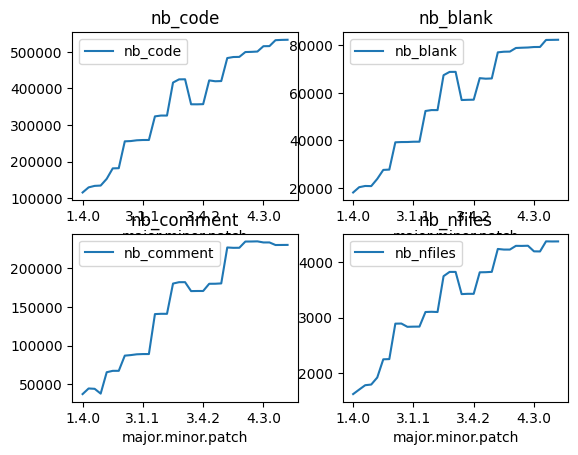

In [40]:
fig,axes = plt.subplots(2,2)
#plot dataframe with x axis as major.minor and y axis as nb_code, nb_blank, nb_comment, nb_nfiles
df.plot(x='major.minor.patch', y='nb_code', ax=axes[0,0], title='nb_code')
df.plot(x='major.minor.patch', y='nb_blank', ax=axes[0,1], title='nb_blank')
df.plot(x='major.minor.patch', y='nb_comment', ax=axes[1,0], title='nb_comment')
df.plot(x='major.minor.patch', y='nb_nfiles', ax=axes[1,1], title='nb_nfiles')


<AxesSubplot: title={'center': 'nb_nfiles'}, xlabel='major.minor'>

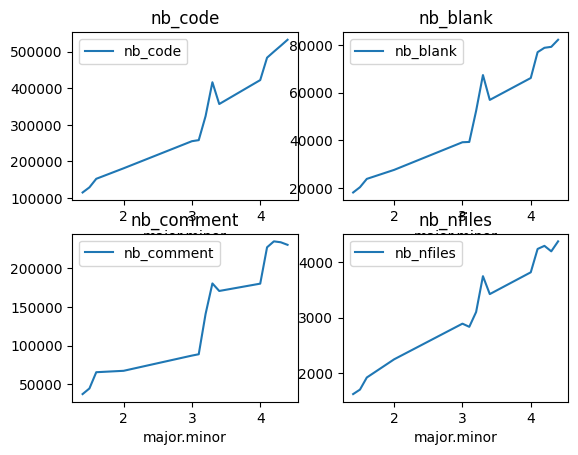

In [41]:
fig,axes = plt.subplots(2,2)
#plot dataframe with x axis as major.minor and y axis as nb_code, nb_blank, nb_comment, nb_nfiles
df2.plot(x='major.minor', y='nb_code', ax=axes[0,0], title='nb_code')
df2.plot(x='major.minor', y='nb_blank', ax=axes[0,1], title='nb_blank')
df2.plot(x='major.minor', y='nb_comment', ax=axes[1,0], title='nb_comment')
df2.plot(x='major.minor', y='nb_nfiles', ax=axes[1,1], title='nb_nfiles')


<AxesSubplot: title={'center': 'nb_nfiles'}, xlabel='date'>

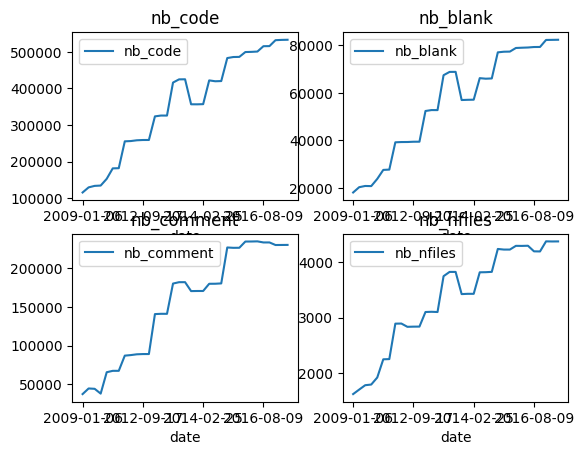

In [42]:
fig,axes = plt.subplots(2,2)
#plot dataframe with x axis as major.minor and y axis as nb_code, nb_blank, nb_comment, nb_nfiles
df.plot(x='date', y='nb_code', ax=axes[0,0], title='nb_code')
df.plot(x='date', y='nb_blank', ax=axes[0,1], title='nb_blank')
df.plot(x='date', y='nb_comment', ax=axes[1,0], title='nb_comment')
df.plot(x='date', y='nb_nfiles', ax=axes[1,1], title='nb_nfiles')

<AxesSubplot: title={'center': 'nb_nfiles'}, xlabel='date'>

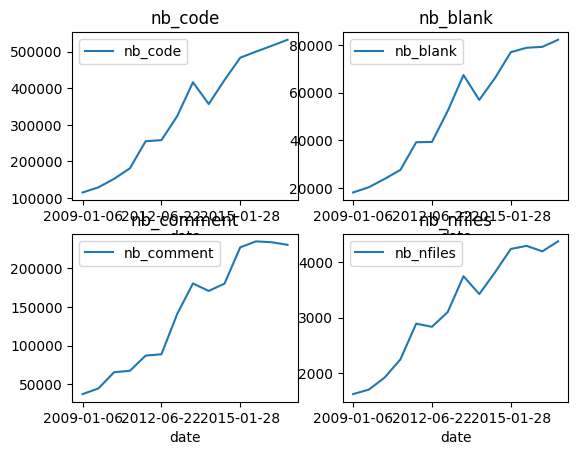

In [43]:
fig,axes = plt.subplots(2,2)
#plot dataframe with x axis as major.minor and y axis as nb_code, nb_blank, nb_comment, nb_nfiles
df2.plot(x='date', y='nb_code', ax=axes[0,0], title='nb_code')
df2.plot(x='date', y='nb_blank', ax=axes[0,1], title='nb_blank')
df2.plot(x='date', y='nb_comment', ax=axes[1,0], title='nb_comment')
df2.plot(x='date', y='nb_nfiles', ax=axes[1,1], title='nb_nfiles')

### Questions:
1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

the difference is that in the first case we just look at the date of the release and in the second case we look at the version.

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

date because we can see the evolution of the project over time and not just the evolution of the version.

3. Choose an option regarding the growth of the software by considering Dataset A. Motivate your choice using a 1d regression plot (below).  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

Linear

<AxesSubplot: xlabel='relative_day', ylabel='nb_nfiles'>

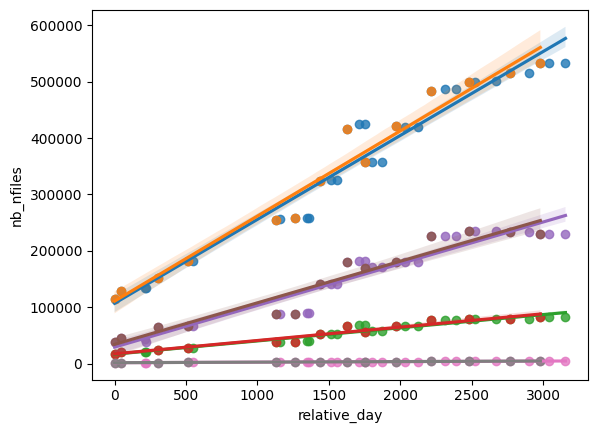

In [51]:
# Your code for regression plot
sns.regplot(y='nb_code', x='relative_day', data=df)
sns.regplot(y='nb_code', x='relative_day', data=df2)
sns.regplot(y='nb_blank', x='relative_day', data=df)
sns.regplot(y='nb_blank', x='relative_day', data=df2)
sns.regplot(y='nb_comment', x='relative_day', data=df)
sns.regplot(y='nb_comment', x='relative_day', data=df2)
sns.regplot(y='nb_nfiles', x='relative_day', data=df)
sns.regplot(y='nb_nfiles', x='relative_day', data=df2)


### Correlation 
Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering Dataset A. Report the correlation upto 3 decimal places

In [54]:
spearmancorr = df['nb_code'].corr(df['nb_nfiles'], method='spearman')
pearsoncorr = df['nb_code'].corr(df['nb_nfiles'], method='pearson')
print(f'Spearman correlation: {spearmancorr:.3f}')
print(f'Pearson correlation: {pearsoncorr:.3f}')

Spearman correlation: 0.977
Pearson correlation: 0.993


### Questions:
4. Do you find any difference in correlation values between Pearson and Spearman? Which one is preferable for this use case? why?

the most prefered is the pearson correlation because it is more accurate with 0.993

5. Based on the above correlation value, how much is the number of lines of code related to the number of files?

based on the correlation value, the number of lines of code is related to the number of files by 0.993

### Prediction
Consider Dataset A for this task. Drop the last two data points in "number of lines of code" (LOC) (i.e. drop (LOC) corresponding to v4.4.1 and v4.4.2) and forecast the values for (LOC) for v4.4.1 and v4.4.2 using a basic linear/polynimial regression model.
1. Drop the last two data points
2. Build a basic regression model
3. Ask the model to forecast the next two data points
4. Plot the LOC original and forecasted in the same plot. x-axis = date, y-axis = number of lines of code

In [55]:
print(df)

    major  minor  patch  nb_code  nb_blank  nb_comment  nb_nfiles        date  \
0       1      4      0   115336     18033       37569       1624  2009-01-06   
1       1      5      0   129319     20261       44820       1705  2009-02-18   
2       1      5      1   133424     20780       44377       1784  2009-08-05   
3       1      5      2   134275     20719       38184       1796  2009-08-17   
4       1      6      1   152705     23755       65761       1923  2009-11-05   
5       2      0      0   181316     27549       67567       2251  2010-06-05   
6       2      0      1   181826     27681       67584       2255  2010-07-06   
7       3      0      0   255305     39181       87179       2894  2012-02-07   
8       3      0      1   256081     39290       87887       2896  2012-03-12   
9       3      1      0   258194     39307       88912       2837  2012-06-22   
10      3      1      1   258951     39420       89215       2840  2012-09-17   
11      3      1      2   25

In [56]:
# drop the last two data points
df = df.drop(df.index[-2:])
print(df)

    major  minor  patch  nb_code  nb_blank  nb_comment  nb_nfiles        date  \
0       1      4      0   115336     18033       37569       1624  2009-01-06   
1       1      5      0   129319     20261       44820       1705  2009-02-18   
2       1      5      1   133424     20780       44377       1784  2009-08-05   
3       1      5      2   134275     20719       38184       1796  2009-08-17   
4       1      6      1   152705     23755       65761       1923  2009-11-05   
5       2      0      0   181316     27549       67567       2251  2010-06-05   
6       2      0      1   181826     27681       67584       2255  2010-07-06   
7       3      0      0   255305     39181       87179       2894  2012-02-07   
8       3      0      1   256081     39290       87887       2896  2012-03-12   
9       3      1      0   258194     39307       88912       2837  2012-06-22   
10      3      1      1   258951     39420       89215       2840  2012-09-17   
11      3      1      2   25

In [57]:
print(df["relative_day"])

0        0
1       43
2      211
3      223
4      303
5      515
6      546
7     1127
8     1161
9     1263
10    1350
11    1360
12    1441
13    1514
14    1561
15    1626
16    1709
17    1752
18    1752
19    1805
20    1876
21    1970
22    2036
23    2127
24    2213
25    2312
26    2394
27    2480
28    2526
29    2668
30    2772
31    2899
32    2982
Name: relative_day, dtype: int64


In [59]:
# Build a basic regression model
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

X = df['relative_day'].values.reshape(-1,1)
y = df['nb_code'].values.reshape(-1,1)
polyreg.fit(X, y)

NameError: name 'LinearRegression' is not defined

In [ ]:
#plot the regression line
plt.figure(figsize=(7,7))
plt.scatter(X, y, color='blue')
plt.plot(X, polyreg.predict(X), color='red')
plt.xlabel('Relative day')
plt.ylabel('Number of code lines')
plt.title('Number of code lines vs. relative day')
plt.show()

In [ ]:
#forecast relative day 3044 and 3158, the ones that we dropped
print(f"Forecast for 4.4.1: {polyreg.predict([[3044]])}")
print(f"Forecast for 4.4.2: {polyreg.predict([[3158]])}")

In [ ]:
#plot the original data and the forecasted data
plt.figure(figsize=(7,7))
plt.scatter(X,y)
plt.plot(X, polyreg.predict(X), color='red')
plt.scatter(3044, polyreg.predict([[3044]]), color='green')
plt.scatter(3158, polyreg.predict([[3158]]), color='green')
plt.xlabel('Relative day')
plt.ylabel('Number of code lines')

In [ ]:
#Compute R-squared error
from sklearn.metrics import r2_score

y_old_1 = 532915 #old value for 4.4.1
y_old_2 = 533292 #old value for 4.4.2
y_new_1 = polyreg.predict([[3044]]) #new value for 4.4.1
y_new_2 = polyreg.predict([[3158]]) #new value for 4.4.2

#Convert y_new to a integer
y_new_1 = int(y_new_1)
y_new_2 = int(y_new_2)

#print the y_old_1, y_old_2, y_new_1, y_new_2
print(f"y_old_1: {y_old_1}")
print(f"y_old_2: {y_old_2}")
print(f"y_new_1: {y_new_1}")
print(f"y_new_2: {y_new_2}")


#Compute the R-squared error between the old and new values
r2_score_old = r2_score([y_old_1, y_old_2], [y_new_1, y_new_2])
print(f"R-squared error: {r2_score_old:.3f}")

In [ ]:
#Compute the mean squared error between the old and new values
from sklearn.metrics import mean_squared_error
mean_squared_error_old = mean_squared_error([y_old_1, y_old_2], [y_new_1, y_new_2])
mean_squared_error_old = np.sqrt(mean_squared_error_old)
print(f"Mean squared error: {mean_squared_error_old:.3f}")

### Questions:
6. What is the polynomial degree that you adopted to build the model? Why? 

I chose the degree 2 because it is the best fit for the data.

7. What is the coefficient of determination? (R-squared)

there is an unknown error with the R-squared value that I can't fix. (-20168.655)

8. What is the Root mean square error for the forecasted values?

roughly 26000

### Filtering on coding langugage

Consider the prominent langugages used in this software project and plot the distribution of their LOC in a pie chart for the first and the last versions

In [ ]:
# Your code to get the data for LOC of first and last versions

In [ ]:
# Your pie chart code here

### Question:
9. Do you find any significant difference in the distribution of the language used in the software project between its first and the last version? If so, what is the difference and how much is it?

### Law of increasing growth for coding langugages

Get the LOC for each of the considered prominent langugages (as above) for each version of the form major.minor.patch  
1) Plot the date (x-axis) vs LOC (y-axis) 
2) Plot the date (x-axis) vs proportional LOC (y-axis). Proportional is LOC of a language/total number of LOC

In [ ]:
# Your code to get the LOC for each prominent language of each version

In [ ]:
# Your plotting code here

### Question:
10. Does the prominent languages considered by you obey laws of increasing growth?

11. Does this software project obey the Law of Increasing Growth?

### Modify the CLOC parameters

1. Exclude all bank lines and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
# Your code and plot here

2. Exclude all comment lines and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
# Your code and plot here

3. Exclude all non-code files (or consider prominent coding langugages used in the project) and and verify if the Law of Increasing Growth still holds good for this filtering

In [ ]:
# Your code and plot here

### 2.3 Law of Continuing Change
1. Using CLOC tool, find the features such as number of lines of code that are added, modified, removed and same between two consecutive versions
2. Consider all the three component versions (major.minor.patch) - Dataset A
3. Consider only the minor versions (major.minor) - Dataset B
4. Having all the features in the same plot, create two plots (one for Dataset A and another for Dataset B) the outcomes with date on x-axis and the number on y-axis.
5. Make a subplot of all the features

Code hint:  
For each pair of tags, set the original project to the required tag and the copy of the original project to the next tag.  
To get the required data in json format - "command = f'CLOC/cloc --git --diff {first_project_path} {second_project_path} --json'"

In [ ]:
eucalyptus_project_path = '' # your project path here
eucalyptus_copy_project_path = '' # your path to the copy of your project here
major_minor_patch_versions = '' #set of version that you would like to consider for this analysis

In [ ]:
# Your code here to get the data

In [ ]:
# Your code here to get the dates corresponding to the tags

In [ ]:
# Your plotting code here (all the features in a single plot)

In [ ]:
# Your plotting code here, different plot for each feature
fig,axes = plt.subplots(2,2)

### Questions:
1. Do you find the Law of Continuing Change holding good here? Prove it empirically.

2. Does the law of increasing growth too hold good here?

### Law of continuing change for coding languages
Consider the prominent languages used in this software project for versions of the form major.minor.patch
1. Obtain the number of lines of code that are added, modified, removed and same between two consecutive versions
2. Make plots for each parameter (added, modified, removed and same) with date on x-axis  
    a) y-axis number of lines of code   
    b) y-axis proportional number of lines of code (number of lines of code of that language/total number of lines of code) 

In [ ]:
# Your code here

In [ ]:
# Your plotting code here
fig,axes = plt.subplots(2,2)

### Question:
3. Does the law of continuing change obey here for all the considered prominent langugages? Comment on the rate of growth.  

4. Does this software project obey Law of Continuing Change?